Import & Data Visualization

In [17]:
import pandas as pd
data = pd.read_csv("/content/Mobile_Price_Classification-220531-204702.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [18]:
x=data.drop('price_range',axis=1)
y=data['price_range']

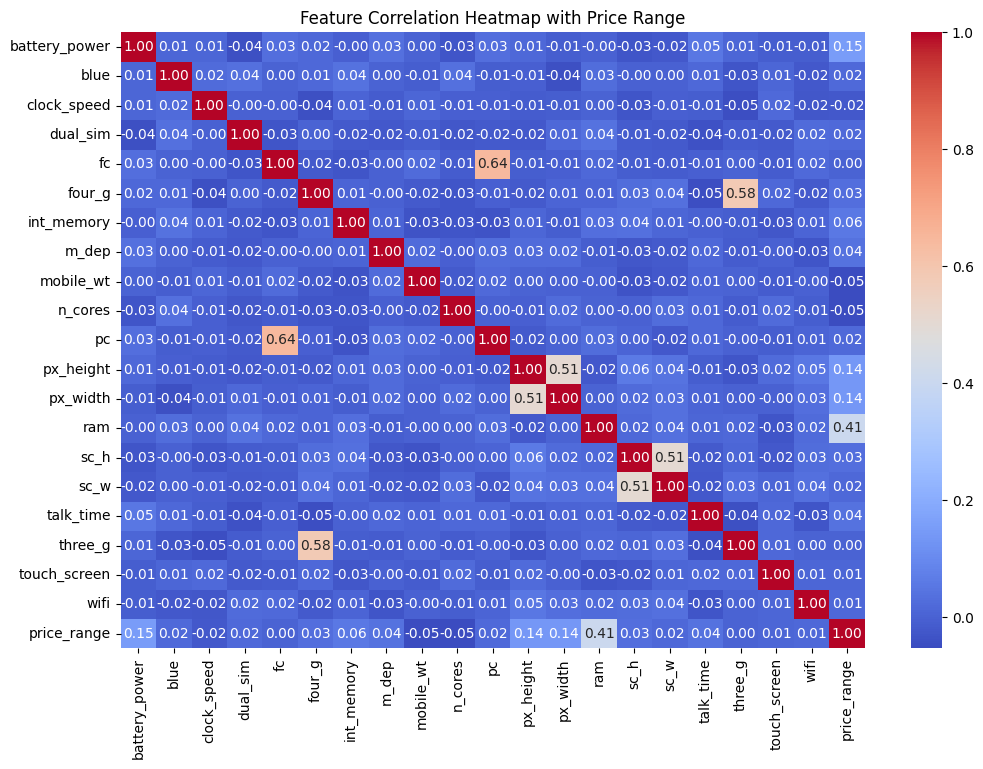

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns


# Step 1: Calculate correlation matrix
corr = data.corr()

# Step 2: Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Feature Correlation Heatmap with Price Range")
plt.show()


Splitting Data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

Normalize Data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5473 - loss: 0.7437 - val_accuracy: 0.5040 - val_loss: 0.7425
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5332 - loss: 0.7227 - val_accuracy: 0.5300 - val_loss: 0.6997
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5847 - loss: 0.6760 - val_accuracy: 0.5460 - val_loss: 0.6786
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5978 - loss: 0.6653 - val_accuracy: 0.5840 - val_loss: 0.6669
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6395 - loss: 0.6432 - val_accuracy: 0.6040 - val_loss: 0.6593
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6203 - loss: 0.6517 - val_accuracy: 0.6200 - val_loss: 0.6532
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6686 - loss: 0.6348 - val_accuracy: 0.6300 - val_loss: 0.6485
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6649 - loss: 0.6301 - val_accuracy: 0.6280 - v

In [27]:
model.save_weights("mobile_price_model.weights.h5")
print("Mobile Phone model weight ='mobile_price_model.weights.h5'")

Mobile Phone model weight ='mobile_price_model.weights.h5'


In [30]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model accuracy is: {accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7243 - loss: 0.4993 
Model accuracy is: 71.00%
